In [3]:
import subprocess
import numpy as np
import datetime
import random
from tqdm import tqdm
subprocess.check_output(['./bin/tc_mul', 'f47', '2']).decode('utf-8')[:-1]

'156'

In [13]:
TRIALS_PER_SIZE = 50
BIT_LENGTHS = np.arange(4, 4100, 16)

tc = []
gs = []
kara = []

def trial(path, a, b):
    start = datetime.datetime.now()
    result = subprocess.check_output([result, '{:x}'.format(a), '{:x}'.format(b)]).decode('utf-8')[:-1] 
    end = datetime.datetime.now()
    return (end - start).total_seconds()



for i in tqdm(BIT_LENGTHS):
    tc_trials = []
    gs_trials = []
    kara_trials = []
    for _ in range(TRIALS_PER_SIZE):
        a = random.getrandbits(i) * random.choice([-1, 1])
        b = random.getrandbits(i) * random.choice([-1, 1])
        
        tc_start = datetime.datetime.now()
        tc_result = subprocess.check_output(['./bin/tc_mul', '{:x}'.format(a), '{:x}'.format(b)]).decode('utf-8')[:-1]
        tc_end = datetime.datetime.now()
#         if tc_result != "{:x}".format(a * b):
#             print(tc_result)
#             print("{:x}".format(int(tc_result)))
#             print("{:x},{:x},{:x}".format(a, b, a * b))
#             assert False

        tc_trials.append((tc_end - tc_start).total_seconds())
        
        gs_start = datetime.datetime.now()
        gs_result = subprocess.check_output(['./bin/gs_mul', '{:x}'.format(a), '{:x}'.format(b)]).decode('utf-8')[:-1] 
        gs_end = datetime.datetime.now()
#         assert gs_result == "{:x}".format(a * b)
#         if gs_result != "{:x}".format(a * b):
#             print(gs_result)
#             print("{:x},{:x},{:x}".format(a, b, a * b))
#             assert False
            
        gs_trials.append((gs_end - gs_start).total_seconds())

        kara_start = datetime.datetime.now()
        kara_result = subprocess.check_output(['./bin/kara_mul', '{:x}'.format(a), '{:x}'.format(b)]).decode('utf-8')[:-1] 
        kara_end = datetime.datetime.now()
#         assert kara_result == "{:x}".format(a * b)
#         if kara_result != "{:x}".format(a * b):
#             print(kara_result)
#             print("{:x},{:x},{:x}".format(a, b, a * b))
#             assert False

        kara_trials.append((kara_end - kara_start).total_seconds())

    tc.append(np.mean(tc_trials))
    gs.append(np.mean(gs_trials))
    kara.append(np.mean(kara_trials))




    





 96%|█████████████████████████████████████████████████████████████▌  | 246/256 [38:20<01:33,  9.35s/it]


FileNotFoundError: [Errno 2] No such file or directory: './bin/tc_mul'

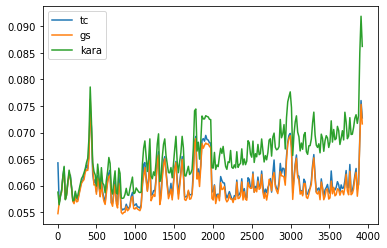

In [16]:

# plot the results 
import matplotlib.pyplot as plt
plt.figure()
plt.plot(BIT_LENGTHS[:246], tc[:246], label='tc')
plt.plot(BIT_LENGTHS[:246], gs[:246], label='gs')
plt.plot(BIT_LENGTHS[:246], kara[:246], label='kara')
plt.legend()
plt.show()

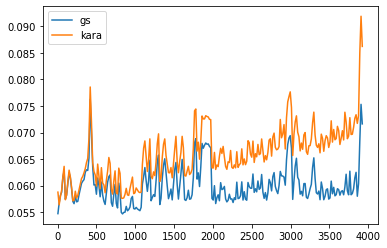

In [17]:

# plot the results 
import matplotlib.pyplot as plt
plt.figure()
# plt.plot(BIT_LENGTHS[:246], tc[:246], label='tc')
plt.plot(BIT_LENGTHS[:246], gs[:246], label='gs')
plt.plot(BIT_LENGTHS[:246], kara[:246], label='kara')
plt.legend()
plt.show()